In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

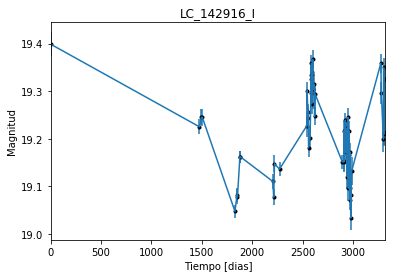

In [2]:
data = np.genfromtxt('LC_142916_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_142916_I')
plt.savefig("LC_142916_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

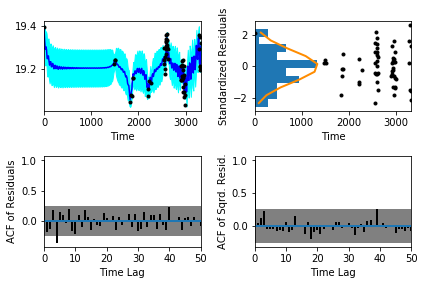

In [5]:
sample.assess_fit()

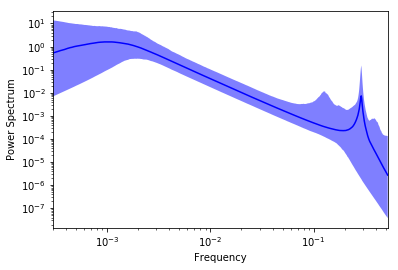

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

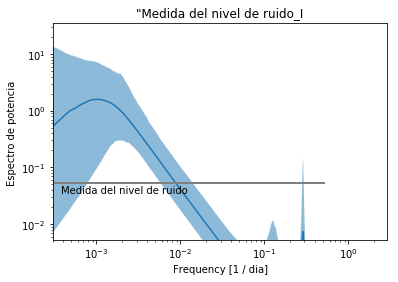

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_142916_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_142916_I')

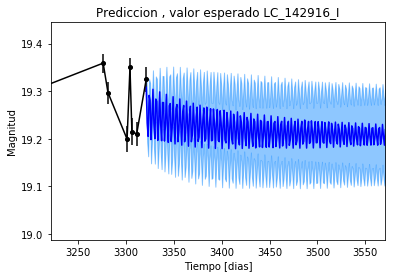

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_142916_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_142916_I')

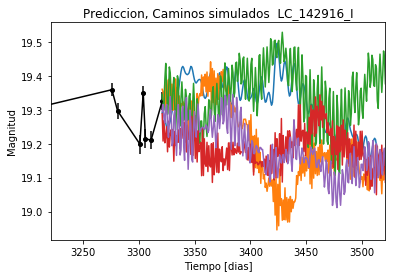

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_142916_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


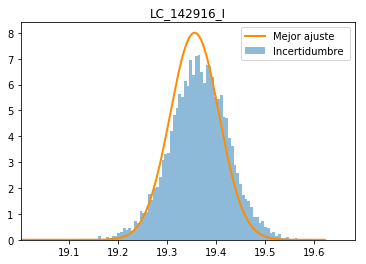

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_142916_I')
plt.savefig("Mejor_ajuste_LC_142916_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_142916_I')

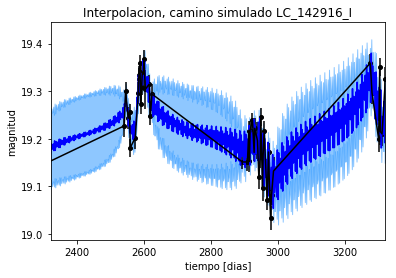

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_I')

Text(0.5,1,'Interpolacion, camino simulado LC_142916_I')

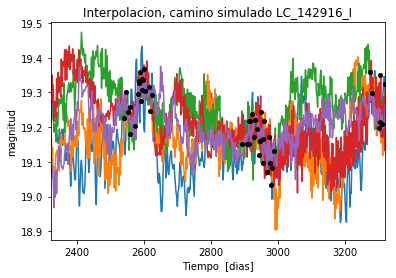

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1213.70911496
Median: 0.00470694346254
Standard deviation: 0.0400181935038
68% credibility interval: [ 0.00182436  0.01135479]
95% credibility interval: [ 0.00055883  0.0493434 ]
99% credibility interval: [ 0.00036543  0.24540646]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1182.97855167
Median: 0.00470548564456
Standard deviation: 0.0384645731269
68% credibility interval: [ 0.00182413  0.01133252]
95% credibility interval: [ 0.00055883  0.04913717]
99% credibility interval: [ 0.00036543  0.2453913 ]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 173.561211728
Median: 0.000818874524575
Standard deviation: 0.215362663578


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 325.067473242
Median: 112.537535475
Standard deviation: 2.83336884595
68% credibility interval: [ 108.73923171  114.5878465 ]
95% credibility interval: [ 105.4420273   115.63187925]
99% credibility interval: [ 103.26952951  116.07967743]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 209.342885559
Median: 0.115154754129
Standard deviation: 1.46802525229
68% credibility interval: [ 0.05016087  2.04285173]
95% credibility interval: [ 0.02757485  5.06168061]
99% credibility interval: [ 0.01613052  6.73472292]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 347.77567172
Median: 3.32170778634
Standard deviation: 8.13641610453
68% credibility interval: [  3.06561436  20.12015593]
95% credibility interval: [  0.55522366  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 360.254592156
Median: 1.12717331773e+28
Standard deviation: 5.88059604216e+99
68% credibility interval: [  4.02814835e-11   2.86975239e+51]
95% credibility interval: [  1.59205436e-49   2.47615263e+89]
99% credibility interval: [  4.45954317e-79   7.56089601e+99]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 629.309816313
Median: 19.2084727155
Standard deviation: 0.0423079055628
68% credibility interval: [ 19.17861578  19.24296721]
95% credibility interval: [ 19.14532455  19.31603033]
99% credibility interval: [ 19.11423875  19.3988648 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 304.013300994
Median: 0.28879212813
Standard deviation: 0.208258049357
68% credibility interval: [ 0.27166075  0.71329964]
95% credibility interval: [ 0.11586056  0.75530086]
99% credibility interval: [ 0.08293868  0.87851139]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 304.013300994
Median: 0.28879212813
Standard deviation: 0.208258049357
68% credibility interval: [ 0.27166075  0.71329964]
95% credibility interval: [ 0.11586056  0.75530086]
99% credibility interval: [ 0.08293868  0.87851139]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 369.996798571
Median: 0.000558522891385
Standard deviation: 0.000826097759

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 325.067473242
Median: 112.537535475
Standard deviation: 2.83336884595
68% credibility interval: [ 108.73923171  114.5878465 ]
95% credibility interval: [ 105.4420273   115.63187925]
99% credibility interval: [ 103.26952951  116.07967743]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 310.514311759
Median: 0.012006886515
Standard deviation: 0.00748628577429
68% credibility interval: [ 0.00792811  0.01954397]
95% credibility interval: [ 0.00560186  0.03225897]
99% credibility interval: [ 0.00462004  0.04948287]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1333.21095741
Median: 1.14795918031
Standard deviation: 0.252991236465
68% credibility interval: [ 0.92557999  1.43657568]
95% credibility interval: [ 0.75734211  1.73982098]
99% credibility interval: [ 0.67335937  1.90759838]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 205.48391791
Median: 3.93595730331e-30
Standard deviation: 0.210971213479
68% credibility interval: [  6.91667305e-53   1.31802060e-01]
95% credibility interval: [  1.55851512e-91   7.79120089e-01]
99% credibility interval: [  1.59737445e-102   1.12752718e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1213.70911496
Median: (-0.0295745980056-1.7964431593j)
Standard deviation: 1.33246304998
68% credibility interval: [-0.07134426-1.76697217j -0.01146277-1.80844471j]
95% credibility interval: [-0.31003374-4.66792723j -0.00351126-4.51617946j]
99% credibility interval: [-1.54193428-4.19428938j -0.00229609-4.47540958j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1182.97855167
Median: (-0.029565438265+1.83742969903j)
Standard deviation: 1.33065550777
68% credibility interval: [-0.07120434+1.13343054j -0.01146136+1.81364516j]
95% credibility interval: [-0.30873793+2.80101599j -0.00351126+4.51617946j]
99% credibility interval: [-1.54183900+4.20409361j -0.00229609+4.47540958j]
Posterior summary for parameter ar_roots  elem